
# TD – Comprendre le Machine Learning avec Python

Ce document vous guidera pas à pas dans l'apprentissage du **Machine Learning avec Python**, à travers des exemples simples, des explications pédagogiques et des implémentations concrètes.

---

## Objectifs pédagogiques :
- Comprendre ce qu’est le Machine Learning et son fonctionnement général
- Identifier les types d’apprentissage : supervisé, non supervisé
- Implémenter une régression linéaire et une régression logistique
- Manipuler des réseaux de neurones simples
- Découvrir le clustering (apprentissage non supervisé)
- Acquérir une méthode pour structurer un projet de ML complet

---



## 1. Qu’est-ce que le Machine Learning ?

Le **Machine Learning (ML)** est une méthode qui permet à un ordinateur **d'apprendre à partir de données**, sans être explicitement programmé.

L'idée est d'identifier des **relations ou motifs** cachés dans des données pour **faire des prédictions** ou **classer de nouvelles données**.

### On distingue 3 grandes familles de Machine Learning :
1. **Apprentissage supervisé** : on connaît la réponse (`y`). Objectif : prédire.
2. **Apprentissage non-supervisé** : pas de réponse donnée. Objectif : regrouper / segmenter.
3. **Apprentissage par renforcement** : l'agent apprend à interagir avec son environnement par essai-erreur (non traité ici).

Dans ce TD, nous nous concentrerons sur les deux premiers.



## 2. Régression Linéaire

La **régression linéaire** est l’un des modèles les plus simples et les plus utilisés.

Elle permet de **modéliser une relation linéaire** entre une variable explicative (`X`) et une variable cible continue (`y`).

> Exemple : prédire la taille (y) en fonction du poids (X).

### Formule mathématique :
y = a * X + b

Le modèle doit apprendre les **coefficients `a` et `b`** à partir des données.


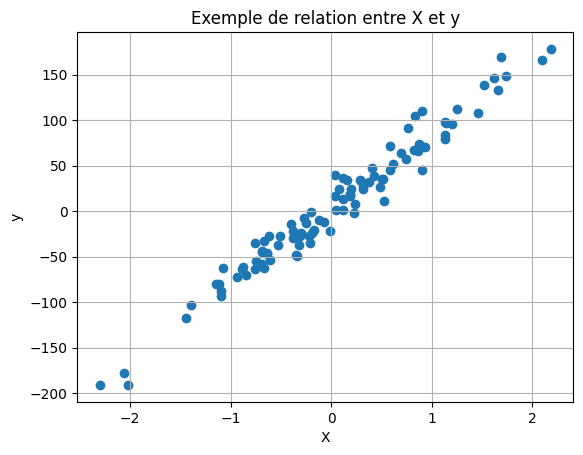

In [ ]:

# Créons un jeu de données synthétique
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, noise=40, random_state=28)

# Affichage du nuage de points
plt.scatter(X, y)
plt.title("Exemple de relation entre X et y")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()


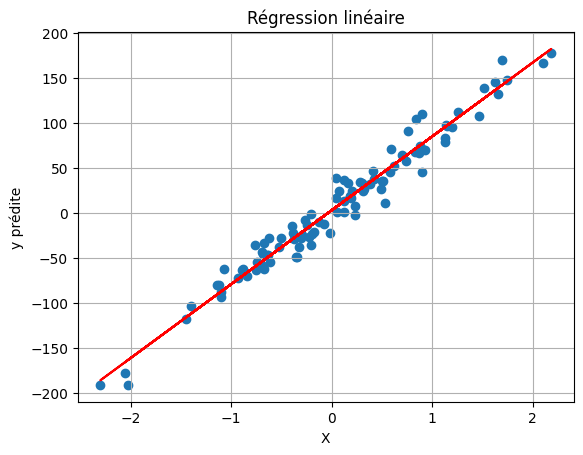

Coefficient (a) : [82.04100436]
Ordonnée à l'origine (b) : 3.0405215832162797
Score R² : 0.9657420190931288


In [2]:

from sklearn.linear_model import LinearRegression

# Entraîner un modèle
reg = LinearRegression()
reg.fit(X, y)

# Affichage
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.title("Régression linéaire")
plt.xlabel("X")
plt.ylabel("y prédite")
plt.grid(True)
plt.show()

print("Coefficient (a) :", reg.coef_)
print("Ordonnée à l'origine (b) :", reg.intercept_)
print("Score R² :", reg.score(X, y))



**Interprétation :**  
- Le **score R²** indique la part de variance expliquée par le modèle (0 à 1).
- Plus R² est proche de 1, plus la prédiction est précise.

---



## 3. Classification avec Régression Logistique

La **régression logistique** est utilisée pour **prédire une catégorie** (ex : oui/non, 0/1).

Elle est très utile pour résoudre des problèmes **de classification binaire**.

### Exemples d’applications :
- Prédire si un email est un spam
- Prédire si un patient est malade ou non


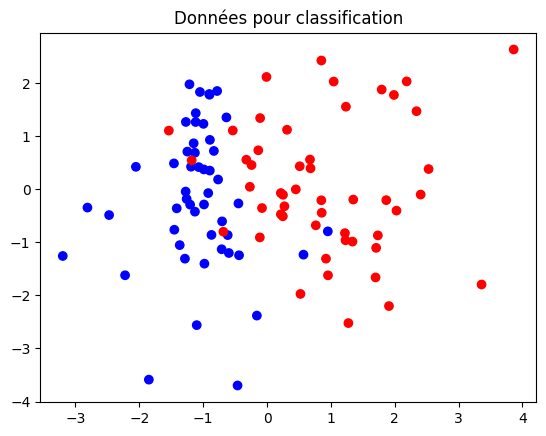

In [3]:

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Données synthétiques avec 2 classes
X_class, y_class = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, random_state=0)
plt.scatter(X_class[:, 0], X_class[:, 1], c=y_class, cmap='bwr')
plt.title("Données pour classification")
plt.show()


In [4]:

# Modèle
clf = LogisticRegression()
clf.fit(X_class, y_class)
print("Précision :", clf.score(X_class, y_class))


Précision : 0.93



**À retenir :**
- La sortie de la régression logistique est une **probabilité**
- Le modèle prédit la classe 1 si p > 0.5, sinon 0



## 4. Réseau de Neurones (MLPClassifier)

Les **réseaux de neurones** sont des modèles puissants capables de modéliser des relations complexes.

Ils sont composés de **couches de neurones**. Chaque neurone reçoit des entrées, applique une transformation, puis transmet le résultat.

Un réseau simple peut déjà donner de bons résultats sur des problèmes classiques de classification.


In [5]:

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=0)
mlp.fit(X_class, y_class)
print("Précision Réseau de Neurones :", mlp.score(X_class, y_class))


Précision Réseau de Neurones : 0.93



## 5. Apprentissage Non-Supervisé : K-Means Clustering

Le **clustering** consiste à **regrouper des observations** similaires, sans connaître les étiquettes (pas de `y`).

L’algorithme **K-Means** crée `k` groupes (clusters) à partir de la distance entre les points.


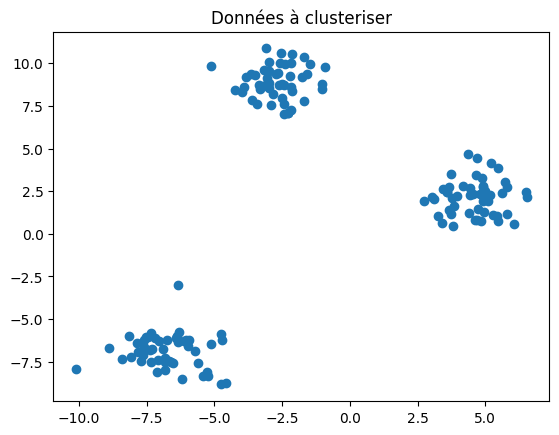

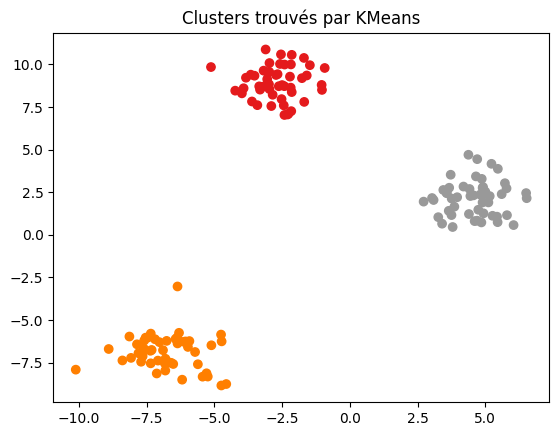

In [6]:

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X_unsup, _ = make_blobs(n_samples=150, centers=3, random_state=42)
plt.scatter(X_unsup[:, 0], X_unsup[:, 1])
plt.title("Données à clusteriser")
plt.show()

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_unsup)
plt.scatter(X_unsup[:, 0], X_unsup[:, 1], c=kmeans.labels_, cmap='Set1')
plt.title("Clusters trouvés par KMeans")
plt.show()



## 6. Mener un projet de Machine Learning

### Les grandes étapes d’un projet ML :
1. Compréhension du problème métier
2. Collecte et exploration des données
3. Nettoyage et transformation
4. Modélisation (choix du modèle)
5. Évaluation des performances
6. Optimisation (GridSearch, cross-validation)
7. Déploiement ou interprétation

### Métriques utiles :
- `accuracy_score` : % de bonnes prédictions
- `confusion_matrix` : erreurs de classification
- `classification_report` : précision, rappel, F1-score

---

Ce TD vous fournit une vue d’ensemble et des outils pratiques pour démarrer vos propres projets Machine Learning avec confiance.
